# Classification sur les données load_breast_cancer

Le but est de savoire si une tumeur est bégigne (0) ou maligne (1).
* Toutes les variables de data_cancer excepté la variable target sont explicatives et servent à prédire l'aspect bégnin ou malin d'une tumeur
* La variable target est la variable que l'on veut prédir à l'aide du modêle :
  * target vaut 1 si la tumeur est maligne
  * target vaut 0 si la tumeur est bégigne

In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer

import numpy as np
data_breast_cancer = load_breast_cancer()
l = data_breast_cancer.target.shape[0]
dataint = np.concatenate((data_breast_cancer.data,data_breast_cancer.target.
                          \reshape(l,1).axis=1)

list_var = data_breast_cancer.feature_names.tolist() + ['target']
data_cancer = pd.DataFrame(dataint,columns=list_var)

1) On détermine les les colonnes du dataframe data_cancer:

In [2]:
data_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

2) On va faire l'ensemble des variables explicatives X, et Y l'ensemble correspondant à la variable à expliquer/prédire. Ces deux ensembles ont le même nombre de ligne. 

In [4]:
var_exp = [o for o in data_cancer.columns if o!='target']
X = data_cancer[var_exp]
Y = data_cancer['target']

3) On divise X et Y en échantillon d'apprentissage et de test:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,
                                                    \random_state=1998)

## Exemple regression logistic.

1) On fait une rgression logistic sur X_train et  Y_train:

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

2) La prédiction sur l'ensemble de X_test est PRED_test. On affiche les 21 premières prédictions.

In [7]:
PRED_test = clf.predict(X_test)
PRED_test[0:20]

array([ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.])

## Exemple: random forest sur le dataframe data_cancer

1) On va créer l'ensemble d'aprentissage et de test. 
* X représente l'ensemble des variables explicative
* Y représente la variable à prédire

In [9]:
from sklearn.model_selection import train_test_split

var_expl = [o for o in data_cancer.columns if o!='target']
X = data_cancer[var_expl]
Y = data_cancer['target']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,
                                                    \random_state=1998)

2) On va appeler le modêle random forest sur l'ensemble d'apprentissage.

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf =  RandomForestClassifier(n_estimators = 10 ,criterion='gini',
                              \max_depth=5,max_features=10,\
                              random_state=1998)

clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1998,
            verbose=0, warm_start=False)

3) On va Tester ce modêle sur l'ensemble de test.

In [11]:
clf.predict(X_test)[0:10,]

array([ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.])

4) On va calculer l'accuracy_score.

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,clf.predict(X_test))

0.94680851063829785

5) On va calculer le score AUC.

In [13]:
from sklearn.metrics import roc_auc_score, auc
roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1])

0.99329359165424735

In [14]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.993293591654


In [15]:
from scipy.integrate import trapz
trapz(tpr,fpr)

0.99329359165424735

6) On va tracer la courbe ROC.

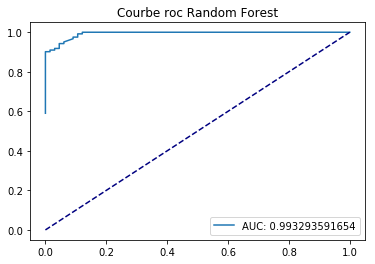

In [16]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])

import matplotlib.pyplot as plt
plt.title("Courbe roc Random Forest")
plt.plot(fpr,tpr,label="AUC: "+str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.show()

7) On va afficher la matrice de confusion

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, clf.predict(X_test))

array([[ 62,   4],
       [  6, 116]])

8) On fait une GridSearchCV. On affiche ensuite: best_estimator_, best_score_, best_params_.

In [18]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':list(range(3,20)), 'max_depth':list(range(3,10)),\
              'max_features':list(range(5,20)),'criterion':['gini','entropy']}

from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
clf = GridSearchCV(rdf, parameters,scoring='roc_auc')
clf.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [30]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features=7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=19, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
clf.best_score_

0.98918038465389346

In [33]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 7, 'n_estimators': 19}

## Exemple: gradient boosting tree sur le dataframe data_cancer

1) On va créer l'ensemble d'aprentissage et de test.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1998,\
                                                    test_size=0.33)

2) On va appeler le modêle gradient boosting tree sur l'ensemble d'apprentissage.

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,\
                                 max_features=10,max_depth=3, random_state=1998)
clf.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=10, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1998,
              subsample=1.0, verbose=0, warm_start=False)

3) On va Tester ce modêle sur l'ensemble de test.

In [37]:
clf.predict(X_test)[0:10,]

array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.])

4) On va calculer l'accuracy_score

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,clf.predict(X_test))

0.96808510638297873

5) On va calculer le score AUC

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1])

0.9976403378042723

6) On va tracer la courbe ROC

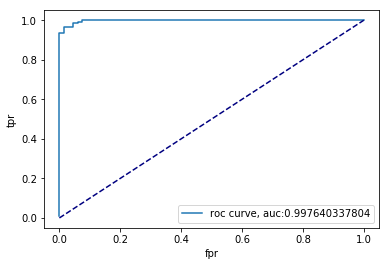

In [47]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test,clf.predict_proba(X_test)[:,1])
auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="roc curve, auc:"+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.legend(loc=4)
plt.show()

In [46]:
from scipy.integrate import trapz
trapz(tpr,fpr)

0.9976403378042723

7) On va afficher la matrice de confusion

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,clf.predict(X_test))

array([[ 62,   4],
       [  2, 120]])

8) On fait une GridSearchCV. On affiche ensuite:

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':list(range(50,200)), 'max_depth':list(range(3,15)),\
              'max_features':list(range(10,20)),\
             'loss':['deviance','exponential'], \
              'learning_rate':np.linspace(0.01,0.1,10)}

from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier()
clf = GridSearchCV(gbt, parameters,scoring='roc_auc')
clf.fit(X_train,Y_train)

## Exemple: neural network sur le dataframe data_cancer

1) On va créer l'ensemble d'aprentissage et de test.

In [2]:
from sklearn.model_selection import train_test_split

var_expl = [o for o in data_cancer.columns if o!='target']
X = data_cancer[var_expl]
Y = data_cancer['target']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,\
                                                    random_state=1998)

2) On va appeler le modêle de neural network avec 2 couche cachées de taille 10 neurones et 12 neurones sur l'ensemble d'apprentissage.

In [3]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10,12),activation='tanh', \
                    solver='adam',random_state=1998)
clf.fit(X_train,Y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 12), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1998,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

3) On va Tester ce modêle sur l'ensemble de test.

In [26]:
clf.predict(X_test)[0:10,]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

4) On va calculer l'accuracy_score.

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,clf.predict(X_test))

0.88829787234042556

5) On va calculer le score AUC.

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1])

0.94274714356681566

6) On va tracer la courbe ROC.

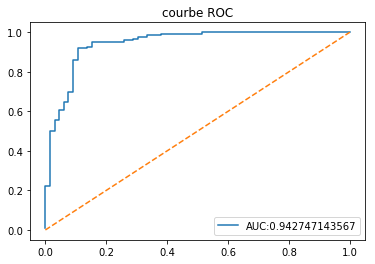

In [42]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test,clf.predict_proba(X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="AUC:"+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],linestyle='--')
plt.title('courbe ROC')
plt.legend(loc=4)
plt.show()

In [43]:
from scipy.integrate import trapz
trapz(tpr,fpr)

0.94274714356681566

7) On va afficher la matrice de confusion

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,clf.predict(X_test))

array([[ 59,   7],
       [ 14, 108]])

8) On fait une GridSearchCV. On affiche ensuite:
* best_estimator_
* best_score_
* best_params_

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
parameters = {'hidden_layer_sizes':[(10,12),(10,10,10),(20,20)],\
              'activation':['logistic','tanh','relu'],\
             'solver':['lbfgs', 'sgd','adam'],'random_state':[1998],'max_iter':[500,1000]}

nn = MLPClassifier()
clf = GridSearchCV(nn, parameters,scoring='roc_auc')
clf.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(10, 12), (10, 10, 10), (20, 20)], 'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'random_state': [1998], 'max_iter': [500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [58]:
#len(clf.coefs_)
clf.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 12), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1998,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [59]:
clf.best_score_

0.98704969788430097

In [60]:
clf.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (10, 12),
 'max_iter': 500,
 'random_state': 1998,
 'solver': 'lbfgs'}

In [68]:
from sklearn.neural_network import MLPClassifier
nnnew = MLPClassifier(hidden_layer_sizes= (10, 12),solver='lbfgs',activation='relu',max_iter=500,random_state=1998)
nnnew.fit(X_train,Y_train)

from sklearn.metrics import roc_auc_score, accuracy_score
print(roc_auc_score(Y_test,nnnew.predict_proba(X_test)[:,1]))
print(accuracy_score(Y_test,nnnew.predict(X_test)))

0.991927471436
0.952127659574


# Exercice

## Exercice création du Dataframe crédit
Voici la liste des variables constituant le fichier csv crédit
* A1: b, a.
* A2: continuous.
* A3: continuous.
* A4: u, y, l, t.
* A5: g, p, gg.
* A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
* A7: v, h, bb, j, n, z, dd, ff, o.
* A8: continuous.
* A9: t, f.
* A10: t, f.
* A11: continuous.
* A12: t, f.
* A13: g, p, s.
* A14: continuous.
* A15: continuous.
* A16: +,- (class attribute)

Les variables A2, A3, A8, A11, A14, A15 sont continues. Les autres variables sont discrétes.<br>
La variable que l'on veut prédire est A16. Les autres variables sont explicatives (features).<br><br>
A partir du fichier credit.csv créer un dataframe pandas DATA_CREDIT de la façon suivantes:
* en dummifiants toutes les variables discrétes
* en suprimant toutes les lignes ayant des valeurs non renseignées. Ces valeurs sont codées avec '?'.
* en transformant les + de la colonne A16 en 1 et les - de la colonne A16 en 0

Pour charger le fichier csv credit.csv: https://www.dropbox.com/s/bsyjnxe51w49y21/credit.csv?dl=0<br>

Vous pouvez télécharger le dataframe attendue. C'est le fichier credit.pkl: https://www.dropbox.com/sh/3sfu75df0lytgqk/AADLDVhlbnLtyFlyhRzt6yJta?dl=0. 

## Données pour les Exercices 1 à 4
Pour les exercice 1 à 4, il faut utiliser le fichier credit.pkl téléchargeable à partir de cet espace.<br>
https://www.dropbox.com/sh/3sfu75df0lytgqk/AADLDVhlbnLtyFlyhRzt6yJta?dl=0.<br>
Enregistrer ce fichier en local. Les variables sont décrites dans l'exercice création dataframe.<br>
Exécuter le code ci-dessous.

In [26]:
import pandas as pd
import numpy as np
rep = "/home/fabien/Bureau/Python Dauphine/DATABASE/credit approval/credit.pkl"
DATA_CREDIT = pd.read_pickle(rep)

In [21]:
DATA_CREDIT.head(2)

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.00,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.46,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1


Les colonnes de DATA_CREDIT sont:

In [23]:
DATA_CREDIT.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_a', 'A1_b', 'A4_l', 'A4_u',
       'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d',
       'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
       'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
       'A13_g', 'A13_p', 'A13_s', 'A16'],
      dtype='object')

### Exercice 1 (random forest classifier)

1) Créer l'ensemble d'aprentissage et de test. L'échantillon de test représente 33% de l'échantillon de départ. Le paramêtre random_state est 1998.

In [20]:
from sklearn.model_selection import train_test_split

var_feature = [o for o in DATA_CREDIT.columns if o!='A16']
X = DATA_CREDIT[var_feature]
Y = DATA_CREDIT['A16']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,\
                                                    random_state=1998)

2) Appeler le modêle random forest sur l'ensemble d'apprentissage.

3) Tester ce modêle sur l'ensemble de test.

4) Calculer l'accuracy_score.

5) Calculer le score AUC.

6) Tracer la courbe ROC.

7) Afficher la matrice de confusion

8) Trouver les paramêtres optimums pour le score accuracy avec une GridSearchCV. Afficher ensuite best_params_, clf.best_estimator_, clf.best_score_

9) Faire un modèle RandomForestClassifier avec les meilleurs parmêtres trouvés dans la question 8. Calculer ensuite l'accuracy_score de votre modèle sur les données de test.

### Exercice 2 (Gradient Boosting tree Classifier)

1) Créer l'ensemble d'aprentissage et de test. L'échantillon de test représente 33% de l'échantillon de départ. Le paramêtre random_state est 1998

2) Appeler le modêle de Gradient Boosting Classifier sur l'ensemble d'apprentissage.

3) Tester ce modêle sur l'ensemble de test.

4) Calculer l'accuracy_score.

5) Calculer le score AUC.

6) Tracer la courbe ROC.

7) Afficher la matrice de confusion:

9) Faire une GridsearchCV avec le modele de Gradiant boosting. Les paramêtres de la grille seront 
* n_estimators variant de 80 à 260,   
* max_depth allant de 3 à 8 et loss
* loss : ['deviance','exponential']

### Exercice 3 (réseau de neurone sur DATA_CREDIT)

1) Créer l'ensemble d'aprentissage et de test. L'échantillon de test représente 25% de l'échantillon de départ. Le paramêtre random_state est 2018

2) Faire un Réseau de neurones NN1 à 2 couches cachées. La première couche caché avec 10 neurones, la deuxième avec 8 neurones. Entrainer le modèle sur X_train et Y_train. La fonction d'activation est logistic. Le solver est lbfgs. Le nombre d'itteration maximum 500, random_state=2018. Entrainer le modèle sur X_train et Y_train.

3) Calculer l'accuracy_score de NN1

4) Calculer le score AUC de NN1

5) Faire un Réseau de neurones NN2 à 3 couches cachées avec le solver 'lbfgs. Les couches auront successivement 10 neurones, 5 neurones et 8 neurones. La fonction d'activation sera logistic random_state=2018. Entrainer le modèle NN2 sur X_train et Y_train.

6) Calculer l'accuracy score de NN2

7) Calculer le score AUC de NN2

8) A quoi correspond le paramêtre solver du modêle MLPClassifier?

9) Tracer sur la même graphe les courbes ROC de NN1 et NN2.

### Exercice 4 (SVM DATA_CREDIT)

1) Créer l'ensemble d'aprentissage et de test. L'échantillon de test représente 25% de l'échantillon de départ. Le paramêtre random_state est 2018.

2) Scaler les données X_train et X_test. Les résultats serons mis dans X_train_scaled et X_test_scaler. Pourquoi doit-on scaler les données? On utilisera StandardScaler

3) Faire un SVM de classification linéaire sur avec la contrainte L2 C=1. Entrainer ce modèle.

4) Calculer le score de précision.

5) Faire un SVM de classification avec 
* un kernel de type 'rbf'
* une contrainte L2 C=1.0
* un coefficient de noyau gamma=1/40

6) Calculer le score de précision.

7) Calculer le score AUC.

8) Trouver les parametres correspondant au SVM ayant le meilleur score AUC au sens de la validation croisé. On se focalisera sur les SVM ayant un noyau polynomiale. 

9) Faire un SVM avec les meilleurs parametre de la question précédante. Afficher son score AUC sur l'échantillon de test.